In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection \
import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , LabelEncoder


Question#1.1 load the data into Pandas dataframe and add a column ”color”. For each class 0, this should contain ”green” and for each class 1 it should contain ”red”

In [2]:
data=pd.read_csv("data_banknote_authentication.csv")
color=[]
for i in range(len(data)):
    if data["class"][i]==0:
        color.append("green")
    else:
        color.append("red")
data["color"]=color
print(data)


      variance  skewness  curtosis  entropy  class  color
0      3.62160   8.66610   -2.8073 -0.44699      0  green
1      4.54590   8.16740   -2.4586 -1.46210      0  green
2      3.86600  -2.63830    1.9242  0.10645      0  green
3      3.45660   9.52280   -4.0112 -3.59440      0  green
4      0.32924  -4.45520    4.5718 -0.98880      0  green
...        ...       ...       ...      ...    ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1    red
1368  -1.38870  -4.87730    6.4774  0.34179      1    red
1369  -3.75030 -13.45860   17.5932 -2.77710      1    red
1370  -3.56370  -8.38270   12.3930 -1.28230      1    red
1371  -2.54190  -0.65804    2.6842  1.19520      1    red

[1372 rows x 6 columns]


Question#1.2 for each class and for each feature f1, f2, f3, f4, compute its mean μ() and standard deviation σ(). Round the results to 2 decimal places and summarize them in a table as shown below:

In [3]:
#f1
f1_mu=[]
f1_mu.append(round(data.loc[(data["class"]==0),:]["variance"].mean(),2))
f1_mu.append(round(data.loc[(data["class"]==1),:]["variance"].mean(),2))
f1_mu.append(round(data["variance"].mean(),2))
f1_std=[]
f1_std.append(round(data.loc[(data["class"]==0),:]["variance"].std(),2))
f1_std.append(round(data.loc[(data["class"]==1),:]["variance"].std(),2))
f1_std.append(round(data["variance"].std(),2))

#f2
f2_mu=[]
f2_mu.append(round(data.loc[(data["class"]==0),:]["skewness"].mean(),2))
f2_mu.append(round(data.loc[(data["class"]==1),:]["skewness"].mean(),2))
f2_mu.append(round(data["skewness"].mean(),2))
f2_std=[]
f2_std.append(round(data.loc[(data["class"]==0),:]["skewness"].std(),2))
f2_std.append(round(data.loc[(data["class"]==1),:]["skewness"].std(),2))
f2_std.append(round(data["skewness"].std(),2))

#f3
f3_mu=[]
f3_mu.append(round(data.loc[(data["class"]==0),:]["curtosis"].mean(),2))
f3_mu.append(round(data.loc[(data["class"]==1),:]["curtosis"].mean(),2))
f3_mu.append(round(data["curtosis"].mean(),2))
f3_std=[]
f3_std.append(round(data.loc[(data["class"]==0),:]["curtosis"].std(),2))
f3_std.append(round(data.loc[(data["class"]==1),:]["curtosis"].std(),2))
f3_std.append(round(data["curtosis"].std(),2))

#f4
f4_mu=[]
f4_mu.append(round(data.loc[(data["class"]==0),:]["entropy"].mean(),2))
f4_mu.append(round(data.loc[(data["class"]==1),:]["entropy"].mean(),2))
f4_mu.append(round(data["entropy"].mean(),2))
f4_std=[]
f4_std.append(round(data.loc[(data["class"]==0),:]["entropy"].std(),2))
f4_std.append(round(data.loc[(data["class"]==1),:]["entropy"].std(),2))
f4_std.append(round(data["entropy"].std(),2))

Q1_d={"Feature":pd.Series(["0","1","all"]),
      "μ(f1)":pd.Series(f1_mu),
      "σ(f1)":pd.Series(f1_std),
      "μ(f2)":pd.Series(f2_mu),
      "σ(f2)":pd.Series(f2_std),
      "μ(f3)":pd.Series(f3_mu),
      "σ(f3)":pd.Series(f3_std),
      "μ(f4)":pd.Series(f4_mu),
      "σ(f4)":pd.Series(f4_std)}
Q1_df=pd.DataFrame(Q1_d)
print(Q1_df)

  Feature  μ(f1)  σ(f1)  μ(f2)  σ(f2)  μ(f3)  σ(f3)  μ(f4)  σ(f4)
0       0   2.28   2.02   4.26   5.14   0.80   3.24  -1.15   2.13
1       1  -1.87   1.88  -0.99   5.40   2.15   5.26  -1.25   2.07
2     all   0.43   2.84   1.92   5.87   1.40   4.31  -1.19   2.10


Question#1.3 examine your table. Are there any obvious patterns in the distribution of banknotes in each class

The variance and skewness of real banknotes will be better than counterfeit banknotes

Question#2.1 split your dataset X into training Xtrain and Xtesting parts (50/50 split). Using ”pairplot” from seaborn package, plot pairwise relationships in Xtrain separately for class 0 and class 1. Save your results into 2 pdf files ”good bills.pdf” and ”fake bills.pdf”

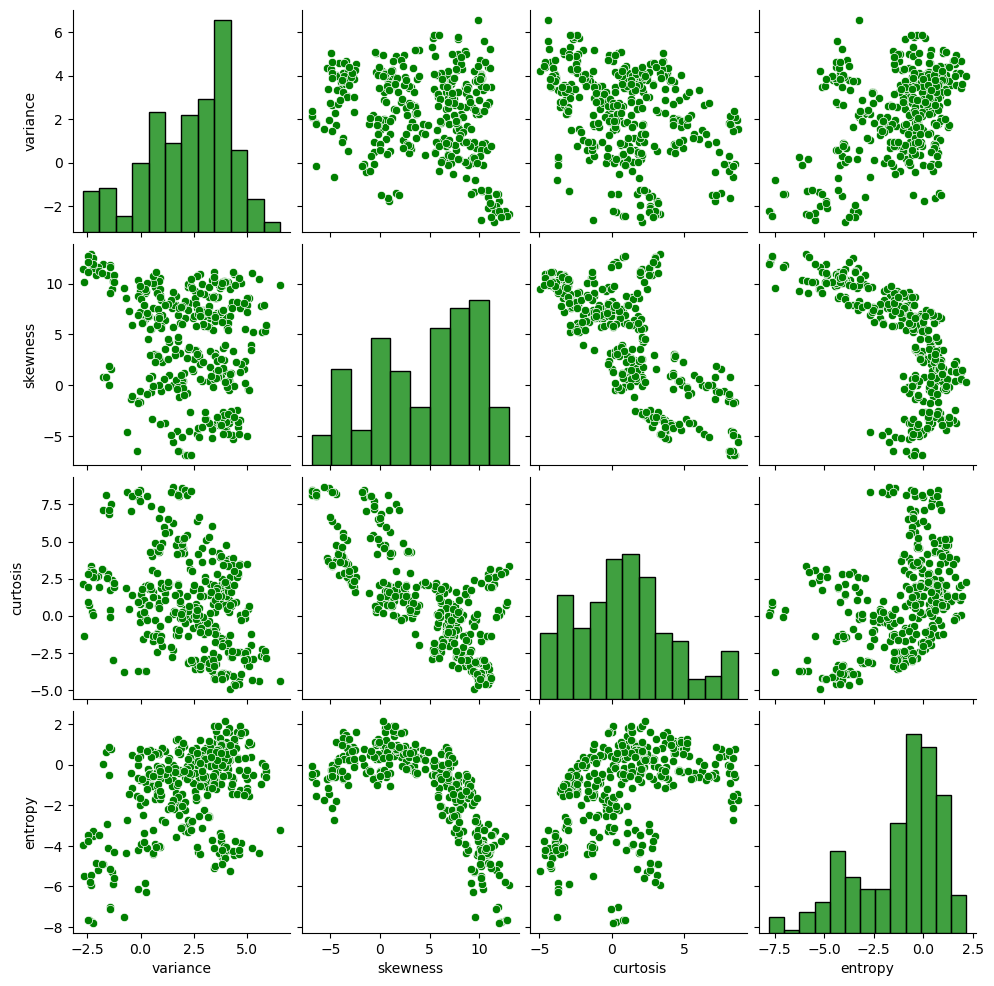

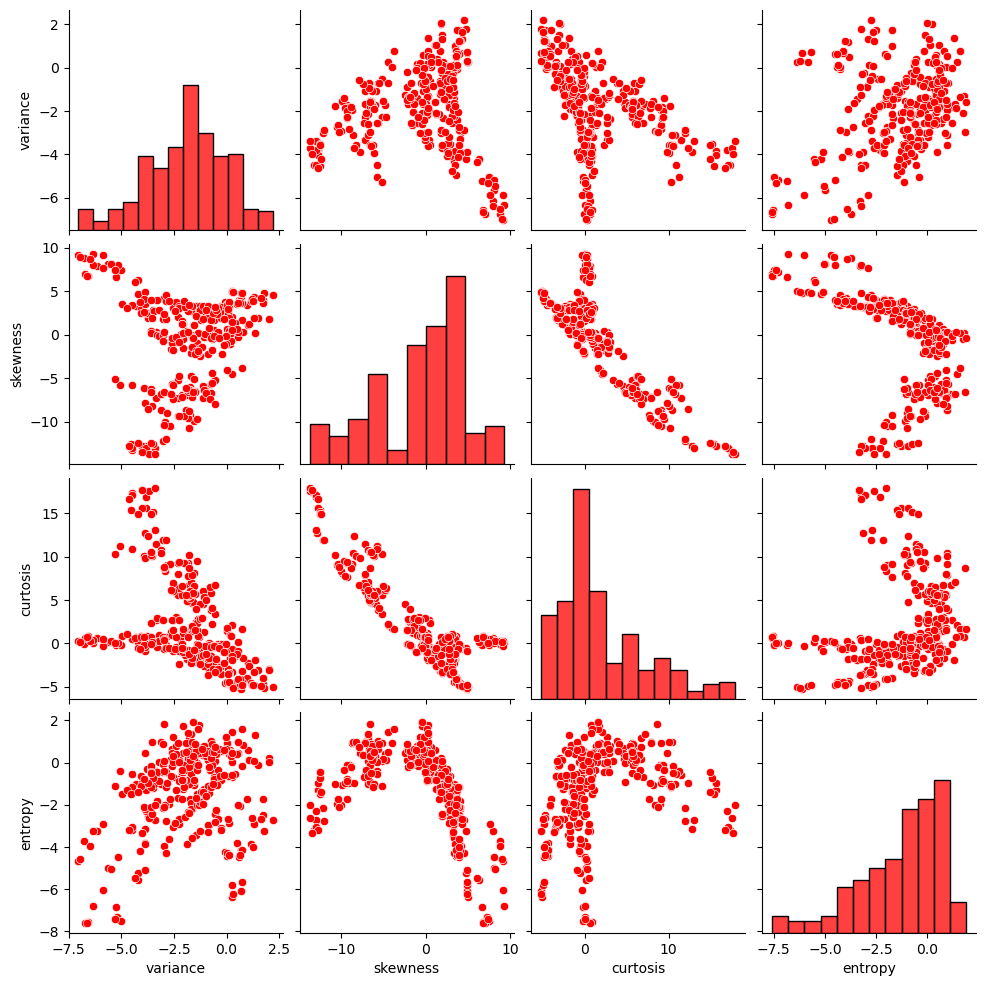

In [4]:



X = data[["variance","skewness","curtosis","entropy","class"]]
y = data["class"]
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.5)
X_train_0=X_train.loc[(X_train["class"]==0),:]
X_train_1=X_train.loc[(X_train["class"]==1),:]


features=["variance","skewness","curtosis","entropy"]
pair_plot_bed = sns.pairplot(X_train_0[features],diag_kws=dict(color='green'),plot_kws=dict(color='green'))
plt.show()
pair_plot_good = sns.pairplot(X_train_1[features],diag_kws=dict(color='red'),plot_kws=dict(color='red'))
plt.show()




Question#2. visually examine your results. Come up with three simple comparisons that you think may be sufficient to detect a fake bill. For example, your classifier may look like this:


In [5]:

X_test.loc[len(data.index)]=[8,2,9,8,0]


X_test["variance_label"]=X_test["variance"].apply(lambda x: 1 if x<0 else 0)
X_test["skewness_label"]=X_test["skewness"].apply(lambda x: 1 if x<5 else 0)
X_test["curtosis_label"]=X_test["curtosis"].apply(lambda x: 1 if x<2.3 else 0)
X_test["entropy_label"]=X_test["entropy"].apply(lambda x: 1 if x>X_test["entropy"].median() else 0)

#data.to_csv("Q2.csv")


X_test=X_test.reset_index(drop=True)

Q2_lable=[]
for i in range(len(X_test)):
    if (X_test["variance_label"][i]+X_test["skewness_label"][i]+X_test["curtosis_label"][i])>=2:
        Q2_lable.append(1)
    else:
        Q2_lable.append(0)
X_test["Q2_label"]=Q2_lable
#print(X_test)


     variance  skewness  curtosis   entropy  class  variance_label  \
0     2.13190  -2.04030   2.55740 -0.061652      0               0   
1    -2.32110   3.16600  -1.00020 -2.715100      1               1   
2    -2.31420  -0.68494   1.98330 -0.448290      1               1   
3    -6.28150   6.66510   0.52581 -7.010700      1               1   
4     4.15420   7.27560  -2.47660 -1.209900      0               0   
..        ...       ...       ...       ...    ...             ...   
682  -2.01490   3.68740  -1.93850 -3.891800      1               1   
683  -0.40804   0.54214  -0.52725  0.658600      1               1   
684  -2.00660  -6.71900   9.01620  0.099985      1               1   
685   4.17360   3.33360  -1.42440  0.604290      0               0   
686   8.00000   2.00000   9.00000  8.000000      0               0   

     skewness_label  curtosis_label  entropy_label  Q2_label  
0                 1               0              1         0  
1                 1              

Question#2.3 apply your simple classifier to Xtest and compute predicted class labels


Question#2.4 compare your predicted class labels with true labels in Xtest, compute the following:

In [6]:
TP_Q2=X_test.loc[(X_test["Q2_label"]==0)&(X_test["class"]==0),:]["class"].count()
FP_Q2=X_test.loc[(X_test["Q2_label"]==0)&(X_test["class"]==1),:]["class"].count()
TN_Q2=X_test.loc[(X_test["Q2_label"]==1)&(X_test["class"]==1),:]["class"].count()
FN_Q2=X_test.loc[(X_test["Q2_label"]==1)&(X_test["class"]==0),:]["class"].count()
TPR_Q2=TP_Q2/(TP_Q2+FN_Q2)
TNR_Q2=TN_Q2/(TN_Q2+FP_Q2)
ACC_Q2=(TP_Q2+TN_Q2)/len(X_test)

Q2_d={"Classifier":pd.Series(["predict"]),
      "TP":pd.Series([TP_Q2]),
      "FP":pd.Series([FP_Q2]),
      "TN":pd.Series([TN_Q2]),
      "FN":pd.Series([FN_Q2]),
      "ACC":pd.Series([ACC_Q2]),
      "TPR":pd.Series([TPR_Q2]),
      "TNR":pd.Series([TNR_Q2])}
Q2_df=pd.DataFrame(Q2_d)
print(Q2_df)


  Classifier   TP  FP   TN   FN       ACC       TPR       TNR
0    predict  255   1  301  130  0.809316  0.662338  0.996689


Question#2.5 summarize your findings in the table as shown below:

This model I customized has a high probability of finding genuine banknotes

Question#2.6 6. does you simple classifier gives you higher accuracy on iden- tifying ”fake” bills or ”real” bills” Is your accuracy better than 50% (”coin” flipping)?

From my anwswer, My model has higher accuracy in identifying fake banknotes, while the probability of identifying real banknotes is relatively low.But both are over 50, so is higher then "coin" flipping

Question#3.1 take k = 3, 5, 7, 9, 11. For each k, generate Xtrain and Xtest using 50/50 split as before. Train your k-NN classifier on Xtrain and compute its accuracy for Xtest

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data_Q3=pd.read_csv("data_banknote_authentication.csv")

def Q3_KNN(Q3_data,n):
    Q3_X=data_Q3[["variance","skewness","curtosis","entropy"]]
    Q3_y=data_Q3["class"]
    Q3_X_train, Q3_X_test, Q3_y_train, Q3_y_test = train_test_split(Q3_X, Q3_y, test_size = 0.5)
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(Q3_X_train, Q3_y_train)
    return accuracy_score(Q3_y_test, knn.predict(Q3_X_test))
#k=3
K_3=Q3_KNN(data_Q3,3)
K_5=Q3_KNN(data_Q3,5)
K_7=Q3_KNN(data_Q3,7)
K_9=Q3_KNN(data_Q3,9)
K_11=Q3_KNN(data_Q3,11)
print("K=3:",K_3)
print("K=5:",K_5)
print("K=7:",K_7)
print("K=9:",K_9)
print("K=3:",K_11)


K=3: 1.0
K=5: 1.0
K=7: 1.0
K=9: 0.9912536443148688
K=3: 1.0


Question#3.2 plot a graph showing the accuracy. On x axis you plot k and on y-axis you plot accuracy. What is the optimal value k∗ of k?

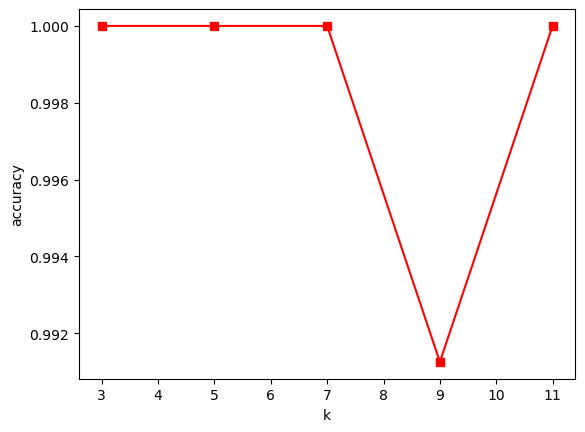

In [8]:
Q3_xlab = [3,5,7,9,11]
plt.plot(Q3_xlab,[K_3,K_5,K_7,K_9,K_11],'s-',color = 'r',label="ATT-RLSTM")
plt.ylabel("accuracy")
plt.xlabel("k")
plt.show()


Question#3.3 use the optimal value k∗ to compute performance measures and summarize them in the table

In [9]:
from sklearn.metrics import confusion_matrix
Q3_X=data_Q3[["variance","skewness","curtosis","entropy"]]
Q3_y=data_Q3["class"]
Q3_X_train, Q3_X_test, Q3_y_train, Q3_y_test = train_test_split(Q3_X, Q3_y, test_size = 0.5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Q3_X_train, Q3_y_train)

Q3_acc=accuracy_score(Q3_y_test, knn.predict(Q3_X_test))
Q3_TN, Q3_FP, Q3_FN, Q3_TP = confusion_matrix(Q3_y_test, knn.predict(Q3_X_test)).ravel()
Q3_TPR=Q3_TP/(Q3_TP+Q3_FN)
Q3_TNR=Q3_TN/(Q3_TN+Q3_FP)


Q3_d={"Classifier":pd.Series(["predict"]),
      "TP":pd.Series([Q3_TP]),
      "FP":pd.Series([Q3_FP]),
      "TN":pd.Series([Q3_TN]),
      "FN":pd.Series([Q3_FN]),
      "ACC":pd.Series([Q3_acc]),
      "TPR":pd.Series([Q3_TPR]),
      "TNR":pd.Series([Q3_TNR])}
Q3_df=pd.DataFrame(Q3_d)
print(Q3_df)

  Classifier   TP  FP   TN  FN  ACC  TPR  TNR
0    predict  296   0  390   0  1.0  1.0  1.0


Question#3.4 is your k-NN classifier better than your simple classifier for any of the measures from the previous table?

The correct rate of the K_NN algorithm is definitely higher than that of the simple classifier

Question#3.5 consider a bill x that contains the last 4 digits of your BUID as feature values. What is the class label predicted for this

In [10]:
data1 = {'variance':[8],
       'skewness':[2],
       'curtosis':[9],
       'entropy':[8]}
df=pd.DataFrame(data1)
#print(type(df))
print(knn.predict(df))


[0]


In the assembled model, I put my BUID information on the last line of the test set. And you get a prediction of 0. And for KNN part I use the last traing data to pridect my BUID.the answer is same. I also got 0.

Question#4.1 take your best value k∗. For each of the four features f1,...,f4, generate new Xtest and Xtrain and drop that feature from both Xtrain and Xtest. Train your classifier on the ”truncated” Xtrain and predict labels on Xtest using just 3 remaining features. You will repeat this for 4 cases: (1) just f1 is missing, (2) just f2 missing, (3) just f3 missing and (4) just f4 is missing. Compute the accuracy for each of these scenarious.


In [11]:
data_Q4=pd.read_csv("data_banknote_authentication.csv")
Q4_X=data_Q4[["variance","skewness","curtosis","entropy"]]
Q4_y=data_Q4["class"]
col=["variance","skewness","curtosis","entropy"]
#for i in range(len(col)):
Q4X_f1=Q4_X.drop(["variance"],axis=1)
Q4_X_train, Q4_X_test, Q4_y_train, Q4_y_test = train_test_split(Q4X_f1, Q4_y, test_size = 0.5)
Q4_knn = KNeighborsClassifier(n_neighbors=5)
Q4_knn.fit(Q4_X_train, Q4_y_train)
print("if I drop","variance","the accurcy is",accuracy_score(Q4_y_test, Q4_knn.predict(Q4_X_test)))
#print(Q4X_1.columns.values)

Q4X_f2=Q4_X.drop(["skewness"],axis=1)
#print(Q4X_f2.columns.values)
Q4_X_train, Q4_X_test, Q4_y_train, Q4_y_test = train_test_split(Q4X_f2, Q4_y, test_size = 0.5)
Q4_knn = KNeighborsClassifier(n_neighbors=5)
Q4_knn.fit(Q4_X_train, Q4_y_train)
print("if I drop","skewness","the accurcy is",accuracy_score(Q4_y_test, Q4_knn.predict(Q4_X_test)))

Q4X_f3=Q4_X.drop(["curtosis"],axis=1)
Q4_X_train, Q4_X_test, Q4_y_train, Q4_y_test = train_test_split(Q4X_f3, Q4_y, test_size = 0.5)
Q4_knn = KNeighborsClassifier(n_neighbors=5)
Q4_knn.fit(Q4_X_train, Q4_y_train)
print("if I drop","curtosis","the accurcy is",accuracy_score(Q4_y_test, Q4_knn.predict(Q4_X_test)))

Q4X_f4=Q4_X.drop(["entropy"],axis=1)
Q4_X_train, Q4_X_test, Q4_y_train, Q4_y_test = train_test_split(Q4X_f4, Q4_y, test_size = 0.5)
Q4_knn = KNeighborsClassifier(n_neighbors=5)
Q4_knn.fit(Q4_X_train, Q4_y_train)
print("if I drop","entropy","the accurcy is",accuracy_score(Q4_y_test, Q4_knn.predict(Q4_X_test)))

if I drop variance the accurcy is 0.9548104956268222
if I drop skewness the accurcy is 0.9810495626822158
if I drop curtosis the accurcy is 0.9723032069970845
if I drop entropy the accurcy is 0.9927113702623906


Question#4.2 did accuracy increase in any of the 4 cases compared with accuracy when all 4 features are used?

From my point of view, when I drop the entropy, the accurcy are higher than other 4.

Question#4.3 which feature, when removed, contributed the most to loss of accuracy?

From my point of view, when I drop the variance, the accurcy are loss accurcy most obvious.

Question#4.4. which feature, when removed, contributed the least to loss of accuracy?

From my point of view, when I drop the entropy, the accurcy are loss accurcy most obvious.

Question#5.1 Use 50/50 split to generate new Xtrain and Xtest. Train your logistic regression classifier on Xtrain and compute its accuracy for Xtest

In [12]:
Q5_X=data_Q3[["variance","skewness","curtosis","entropy"]]
Q5_y=data_Q3["class"]
scaler = StandardScaler() 
scaler.fit(Q5_X)
Q5_X = scaler.transform(Q5_X)
Q5_X_train, Q5_X_test, Q5_y_train, Q5_y_test = train_test_split(Q5_X, Q5_y, test_size = 0.5)
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(Q5_X_train,Q5_y_train)
#predicted = log_reg_classifier.predict(Q5_X_test)
Q5_accuracy = log_reg_classifier.score(Q5_X_test, Q5_y_test)
print("the accuracy for x_test is",Q5_accuracy)




the accuracy for x_test is 0.9795918367346939


Question#5.2 summarize your performance measures in the table

In [13]:
Q5_TN, Q5_FP, Q5_FN, Q5_TP = confusion_matrix(Q5_y_test, log_reg_classifier.predict(Q5_X_test)).ravel()
Q5_TPR=Q5_TP/(Q5_TP+Q5_FN)
Q5_TNR=Q5_TN/(Q5_TN+Q5_FP)


Q5_d={"Classifier":pd.Series(["predict"]),
      "TP":pd.Series([Q5_TP]),
      "FP":pd.Series([Q5_FP]),
      "TN":pd.Series([Q5_TN]),
      "FN":pd.Series([Q5_FN]),
      "ACC":pd.Series([Q5_accuracy]),
      "TPR":pd.Series([Q5_TPR]),
      "TNR":pd.Series([Q5_TNR])}
Q5_df=pd.DataFrame(Q5_d)
print(Q5_df)

  Classifier   TP  FP   TN  FN       ACC       TPR       TNR
0    predict  310  11  362   3  0.979592  0.990415  0.970509


Question#5.3 is your logistic regression better than your simple classifier for any of the measures from the previous table?

Yes, logistic regression is better than simple classifier in terms of TPR, TNR or accuracy

Question#5.4. is your logistic regression better than your k-NN classifier (using the best k∗) for any of the measures from the previous table?


From the results of my data set. KNN still has higher accuracy than logistic regression, TPR and TNR

Question#5.5. consider a bill x that contains the last 4 digits of your BUID as feature values. What is the class label predicted for this bill x by logistic regression? Is it the same label as predicted by k-NN?

In [14]:
print(log_reg_classifier.predict(df))
#the answer is same with knn

[0]


/Users/eamonhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


it's same as knn reawers

Question#6.1. For each of the four features f1, . . . , f4, generate new Xtrain and Xtest and drop that feature from both Xtrain and Xtest. Train your logistic regression classifier on the ”truncated” Xtrain and predict labels on ”truncated” Xtest using just 3 remaining features. You will repeat this for 4 cases: (1) just f1 is missing, (2) just f2 missing, (3) just f3 missing and (4) just f4 is missing. Compute the accuracy for each of these scenarious.


In [15]:
data_Q6=pd.read_csv("data_banknote_authentication.csv")
Q6_X=data_Q6[["variance","skewness","curtosis","entropy"]]
Q6_y=data_Q6["class"]
col=["variance","skewness","curtosis","entropy"]
#for i in range(len(col)):
Q6X_f1=Q6_X.drop(["variance"],axis=1)
Q6_X_train, Q6_X_test, Q6_y_train, Q6_y_test = train_test_split(Q6X_f1, Q6_y, test_size = 0.5)
Q6_f1_log_reg_classifier = LogisticRegression()
Q6_f1_log_reg_classifier.fit(Q6_X_train, Q6_y_train)
print("if I drop","variance","the accurcy is",accuracy_score(Q6_y_test, Q6_f1_log_reg_classifier.predict(Q6_X_test)))
#print(Q4X_1.columns.values)

Q6X_f2=Q6_X.drop(["skewness"],axis=1)
Q6_X_train, Q6_X_test, Q6_y_train, Q6_y_test = train_test_split(Q6X_f2, Q6_y, test_size = 0.5)
Q6_f2_log_reg_classifier = LogisticRegression()
Q6_f2_log_reg_classifier.fit(Q6_X_train, Q6_y_train)
print("if I drop","skewness","the accurcy is",accuracy_score(Q6_y_test, Q6_f2_log_reg_classifier.predict(Q6_X_test)))

Q6X_f3=Q6_X.drop(["curtosis"],axis=1)
Q6_X_train, Q6_X_test, Q6_y_train, Q6_y_test = train_test_split(Q6X_f3, Q6_y, test_size = 0.5)
Q6_f3_log_reg_classifier = LogisticRegression()
Q6_f3_log_reg_classifier.fit(Q6_X_train, Q6_y_train)
print("if I drop","curtosis","the accurcy is",accuracy_score(Q6_y_test, Q6_f3_log_reg_classifier.predict(Q6_X_test)))

Q6X_f4=Q6_X.drop(["entropy"],axis=1)
Q6_X_train, Q6_X_test, Q6_y_train, Q6_y_test = train_test_split(Q6X_f4, Q6_y, test_size = 0.5)
Q6_f4_log_reg_classifier = LogisticRegression()
Q6_f4_log_reg_classifier.fit(Q6_X_train, Q6_y_train)
print("if I drop","entropy","the accurcy is",accuracy_score(Q6_y_test, Q6_f4_log_reg_classifier.predict(Q6_X_test)))

if I drop variance the accurcy is 0.7973760932944607
if I drop skewness the accurcy is 0.9037900874635568
if I drop curtosis the accurcy is 0.8658892128279884
if I drop entropy the accurcy is 0.9912536443148688


Question6.2. did accuracy increase in any of the 4 cases compared with accuracy when all 4 features are used?


when I drop entropy the accurcy are highest in 4 features

Question#6.3. which feature, when removed, contributed the most to loss of accuracy?

From my point of view, when I drop the variance, the accurcy are loss accurcy most obvious.

Question#6.4. which feature, when removed, contributed the least to loss of accuracy?

From my point of view, when I drop the entropy, the accurcy are loss accurcy most obvious.


Question#6.5 is relative significance of features the same as you obtained using k-NN?


From the results of my data set. KNN still has higher accuracy than logistic regression, TPR and TNR